**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

Importing the Dependencies

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
tf.random.set_seed(3)

Loading the MNIST data from keras.datasets

In [7]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [8]:
type(X_train)

numpy.ndarray

In [9]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [10]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [11]:
print(X_train[10].shape)

(28, 28)


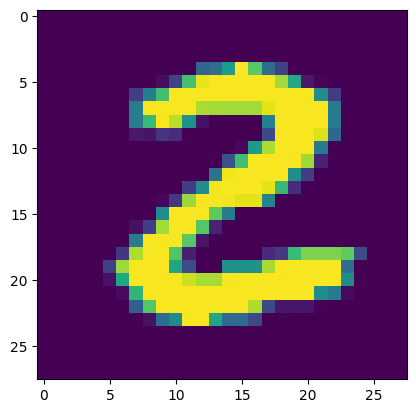

2


In [12]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Image Lables

In [13]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [14]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [15]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [16]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [18]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Input(shape=(28,28)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [19]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 781us/step - accuracy: 0.9152 - loss: 0.2931
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.9582 - loss: 0.1379
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9693 - loss: 0.1011
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9759 - loss: 0.0793
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.9808 - loss: 0.0636
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - accuracy: 0.9838 - loss: 0.0535
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.9866 - loss: 0.0454
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.9887 - loss: 0.0378
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.9900 - loss: 0.0328
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.9914 - loss: 0.0286


Training data accuracy = 98.9%

**Accuracy on Test data:**

In [21]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.9697 - loss: 0.1274
0.9696999788284302


Test data accuracy = 97.1%

In [22]:
print(X_test.shape)

(10000, 28, 28)


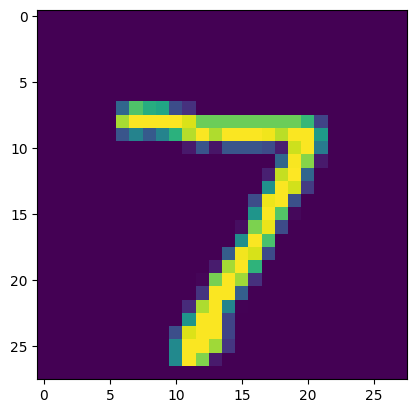

In [23]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [24]:
print(Y_test[0])

7


In [25]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step


In [27]:
print(Y_pred.shape)

(10000, 10)


In [28]:
print(Y_pred[0])

[6.1611199e-06 4.3710433e-02 1.4949287e-01 9.5555943e-01 3.9602878e-06
 1.0699799e-04 4.8651927e-10 1.0000000e+00 2.7709886e-01 9.7373986e-01]


model.predict() gives the prediction probability of each class for that data point

In [29]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [31]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(4), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [34]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [35]:
print(conf_mat)

tf.Tensor(
[[ 952    1    2    1    2    4    5    3    1    9]
 [   0 1117    1    2    1    1    5    1    7    0]
 [   1    3  971   24    2    0    5   11   15    0]
 [   0    0    3  981    1    9    2    5    3    6]
 [   0    0    2    0  954    1    8    6    2    9]
 [   2    0    0    8    2  871    4    1    3    1]
 [   3    1    0    1    4    6  941    1    1    0]
 [   2    0    6    7    0    0    0 1006    2    5]
 [   1    0    1    4    3   12    4    2  943    4]
 [   0    1    0    4   27    6    1    4    5  961]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

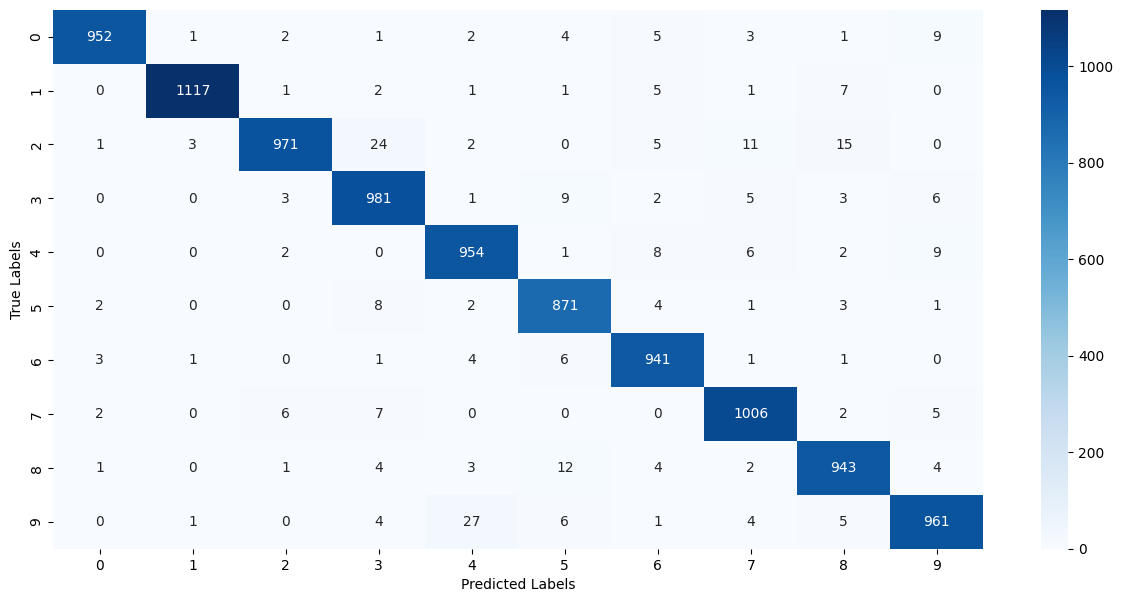

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [37]:
def show_image(img, title=None):

    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()
input_image_path = 'MNIST_digit.png'  # change path as per your system


input_image = cv2.imread(input_image_path)
print(type(input_image))
print(input_image)

# Display original image
show_image(input_image, "Original Image")

grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
print(grayscale.shape)

input_image_resize = cv2.resize(grayscale, (28, 28))
print(input_image_resize.shape)

# Display resized image
show_image(input_image_resize, "Resized 28x28 Grayscale")

input_image_resize = input_image_resize / 255.0
print(type(input_image_resize))

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print("Predicted Label:", input_pred_label)

input_image_path = input('Enter path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
show_image(input_image, "Input Image")

grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize / 255.0

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

print('🧠 The Handwritten Digit is recognised as:', input_pred_label)

<class 'NoneType'>
None


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

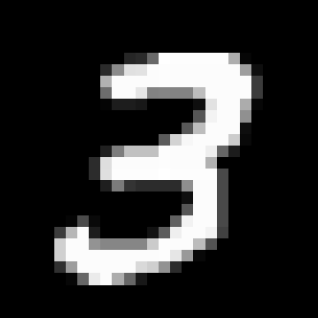

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(318, 318, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

[[5.9389083e-10 9.4131142e-02 1.9494593e-03 1.0000000e+00 4.7541544e-08
  6.3185507e-01 2.8182675e-13 2.7394295e-04 9.5208365e-01 4.5282638e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


**Predictive System**

Path of the image to be predicted: /content/MNIST_digit.png


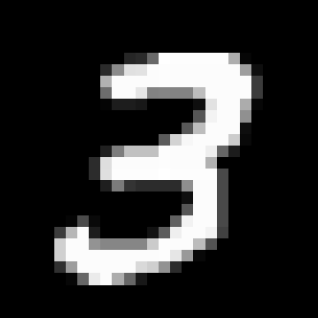

The Handwritten Digit is recognised as  3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)